In [7]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker
from brokenaxes import brokenaxes
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import IPython
import imgkit

# Viscometry Neat CNF

In [8]:
neatCNF_ubvis = '/Users/ningravi/Desktop/Python/RawData ARESG2/Data/NeatCNF_Viscometer/NeatCNF_ViscometerData.xlsx'

start_row = 1
end_row = 8

ubvis_cnfconc = pd.read_excel(neatCNF_ubvis, sheet_name='Sheet1', usecols=[0], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
ubvis_cnfconc_frac = pd.read_excel(neatCNF_ubvis, sheet_name='Sheet1', usecols=[1], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
ubvis_relvis = pd.read_excel(neatCNF_ubvis, sheet_name='Sheet1', usecols=[2], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
ubvis_spvis = pd.read_excel(neatCNF_ubvis, sheet_name='Sheet1', usecols=[3], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
ubvis_redvis = pd.read_excel(neatCNF_ubvis, sheet_name='Sheet1', usecols=[4], nrows=end_row - start_row + 1, skiprows=range(1, start_row))

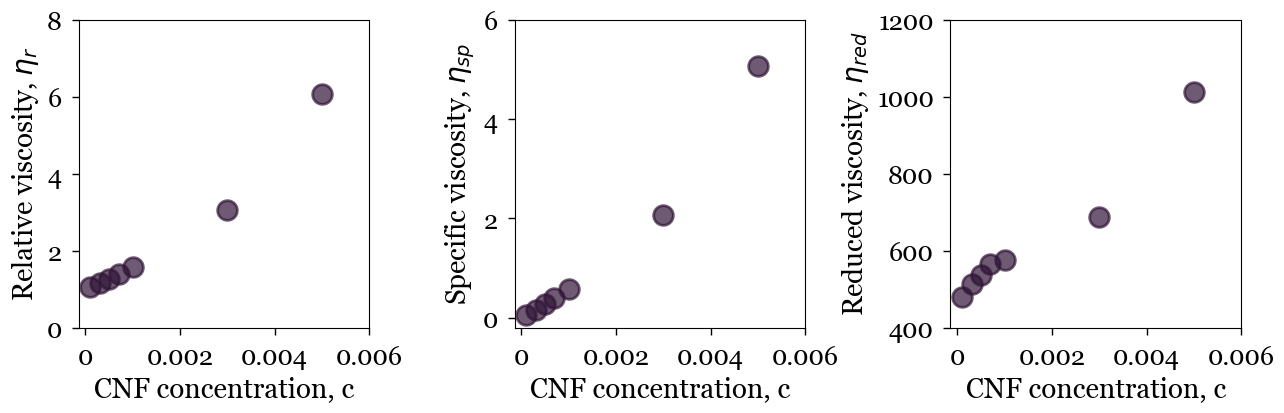

In [9]:
#c0 = 'darkslateblue'
color_rgb = [0.18774482037046955, 0.077251588468039312, 0.21387448578597812]
c0 = tuple(color_rgb)

fig, (ax, ax2, ax3) = plt.subplots(1, 3,  figsize=(15, 4), gridspec_kw={'wspace': 0.5})

ax.scatter(ubvis_cnfconc_frac, ubvis_relvis, s=200, alpha=0.7, marker='o', facecolors=c0, edgecolors=c0, linewidths=2)
ax2.scatter(ubvis_cnfconc_frac, ubvis_spvis, s=200, alpha=0.7, marker='o', facecolors=c0, edgecolors=c0, linewidths=2)
ax3.scatter(ubvis_cnfconc_frac, ubvis_redvis, s=200, alpha=0.7, marker='o', facecolors=c0, edgecolors=c0, linewidths=2)


plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'

ax.set_xlabel('CNF concentration, c', fontsize=20)
ax.set_ylabel("Relative viscosity, $\eta_r$", fontsize=20)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
xticks = [0, 0.002, 0.004, 0.006]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=18)
yticks1 = [0, 2, 4, 6, 8]
ax.set_yticks(yticks1)
ax.set_yticklabels(yticks1, fontsize=18)

ax2.set_xlabel('CNF concentration, c', fontsize=20)
ax2.set_ylabel("Specific viscosity, $\eta_{sp}$", fontsize=20)
ax2.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax2.tick_params(axis='x', length=5, width=1, color='black', direction='out')
xticks = [0, 0.002, 0.004, 0.006]
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks, fontsize=18)
yticks2 = [0, 2, 4, 6]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=18)


ax3.set_xlabel('CNF concentration, c', fontsize=20)
ax3.set_ylabel("Reduced viscosity, $\eta_{red}$", fontsize=20)
ax3.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax3.tick_params(axis='x', length=5, width=1, color='black', direction='out')
xticks = [0, 0.002, 0.004, 0.006]
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticks, fontsize=18)
yticks3 = [400, 600, 800, 1000, 1200]
ax3.set_yticks(yticks3)
ax3.set_yticklabels(yticks3, fontsize=18)

#plt.savefig("Viscometry Data of Neat CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

Fitted parameters:
a viscometer: 98471.70102639757
b viscometer: 475.74285273149064
Intrinsic viscosity $[\eta]$: 475.74285273149064


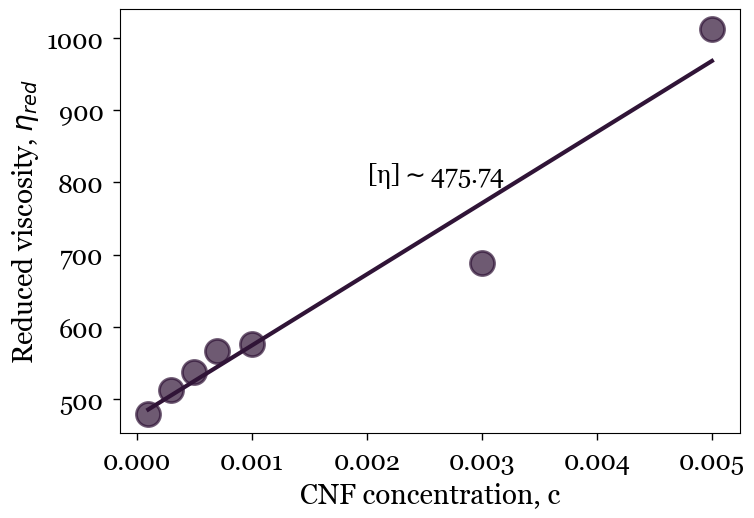

In [10]:
def linear_func(x, a, b):
    return a * x + b

ubvis_cnfconc_frac = np.ravel(ubvis_cnfconc_frac)
ubvis_redvis = np.ravel(ubvis_redvis)

popt_viscometer, _ = curve_fit(linear_func, ubvis_cnfconc_frac, ubvis_redvis)

a_viscometer, b_viscometer = popt_viscometer

print("Fitted parameters:")
print("a viscometer:", a_viscometer)
print("b viscometer:", b_viscometer)
print("Intrinsic viscosity $[\eta]$:", b_viscometer)

plt.scatter(ubvis_cnfconc_frac, ubvis_redvis, s=300, alpha=0.7,  marker='o', facecolors=c0, edgecolors=c0, linewidths=2)

x_fit = np.linspace(min(ubvis_cnfconc_frac), max(ubvis_cnfconc_frac), 100)
y_fit = linear_func(x_fit, *popt_viscometer)
plt.plot(x_fit, y_fit, '-', c=c0, linewidth=3, label='Linear Fit')

plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('CNF concentration, c', fontsize=20)
plt.ylabel("Reduced viscosity, $\eta_{red}$", fontsize=20)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.text(0.002, 800, f"[\u03B7]$\sim${b_viscometer:.2f}", fontsize=18, fontname='Georgia', color='k')
#plt.savefig("Reduced Viscosity of Neat CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

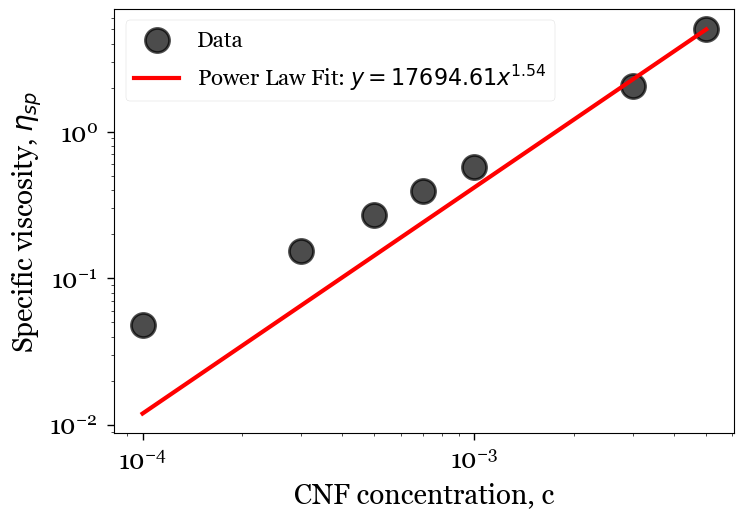

In [15]:
ubvis_cnfconc_frac = np.ravel(ubvis_cnfconc_frac)
ubvis_spvis = np.ravel(ubvis_spvis)

def power_law_func(x, a, b):
    return a * x**b

plt.scatter(ubvis_cnfconc_frac, ubvis_spvis, s=300, alpha=0.7, marker='o', facecolors='k', edgecolors='k', linewidths=2, label='Data')

popt_power_law, _ = curve_fit(power_law_func, ubvis_cnfconc_frac, ubvis_spvis)

a_power_law, b_power_law = popt_power_law

x_fit_power_law = np.logspace(np.log10(min(ubvis_cnfconc_frac)), np.log10(max(ubvis_cnfconc_frac)), 100)
y_fit_power_law = power_law_func(x_fit_power_law, *popt_power_law)
plt.plot(x_fit_power_law, y_fit_power_law, '-', c='red', linewidth=3, label=f'Power Law Fit: $y = {a_power_law:.2f}x^{{{b_power_law:.2f}}}$')

plt.xscale('log')
plt.yscale('log')
plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('CNF concentration, c', fontsize=20)
plt.ylabel("Specific viscosity, $\eta_{sp}$", fontsize=20)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig("Specific Viscosity of Neat CNF loglog 2.png", dpi=1500, bbox_inches='tight')
plt.legend(fontsize=16)
plt.show()

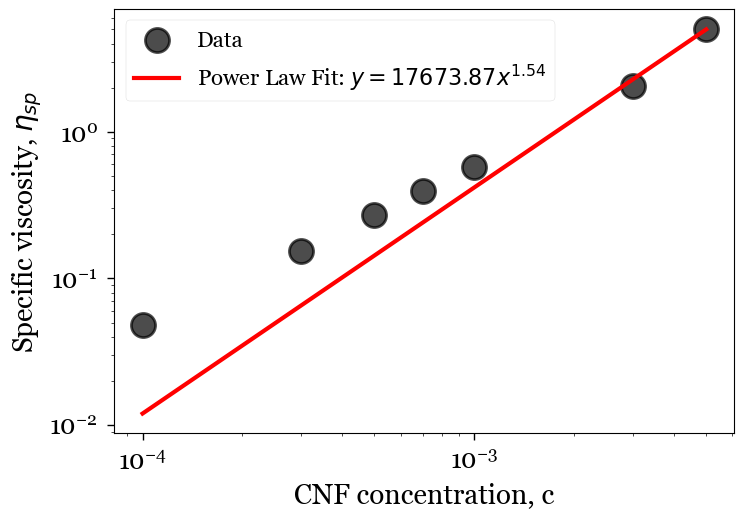

In [16]:
def power_law_func(x, a, b):
    return a * x**b

def objective(params, x, y):
    a, b = params
    y_pred = power_law_func(x, a, b)
    return np.sum((y - y_pred)**2)
initial_params = [1.0, -1.0]

result = minimize(objective, initial_params, args=(ubvis_cnfconc_frac, ubvis_spvis), method='Powell')

a_power_law_opt, b_power_law_opt = result.x

plt.scatter(ubvis_cnfconc_frac, ubvis_spvis, s=300, alpha=0.7, marker='o', facecolors='k', edgecolors='k', linewidths=2, label='Data')

x_fit_power_law_opt = np.logspace(np.log10(min(ubvis_cnfconc_frac)), np.log10(max(ubvis_cnfconc_frac)), 100)
y_fit_power_law_opt = power_law_func(x_fit_power_law_opt, a_power_law_opt, b_power_law_opt)
plt.plot(x_fit_power_law_opt, y_fit_power_law_opt, '-', c='red', linewidth=3, label=f'Power Law Fit: $y = {a_power_law_opt:.2f}x^{{{b_power_law_opt:.2f}}}$')

plt.xscale('log')
plt.yscale('log')
plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('CNF concentration, c', fontsize=20)
plt.ylabel("Specific viscosity, $\eta_{sp}$", fontsize=20)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=16)
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_50616/570505262.py:8: RuntimeWarning: invalid value encountered in log
  y_pred_log = np.log(power_law_func(x, a, b))


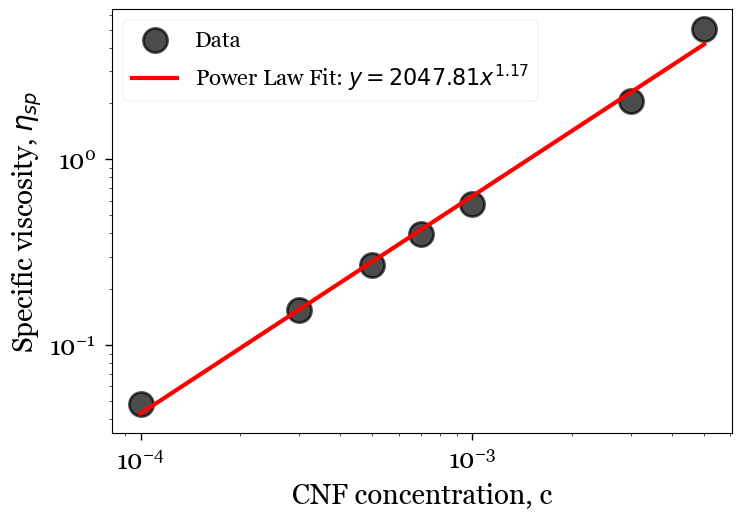

In [17]:
# Define the power-law function
def power_law_func(x, a, b):
    return a * x**b

# Define the objective function to minimize (sum of squared residuals)
def objective(params, x, y):
    a, b = params
    y_pred_log = np.log(power_law_func(x, a, b))
    y_log = np.log(y)
    return np.sum((y_log - y_pred_log)**2)

# Initial guess for parameters
initial_params = [1.0, -1.0]

# Perform the minimization
result = minimize(objective, initial_params, args=(ubvis_cnfconc_frac, ubvis_spvis), method='Powell')

# Extract the optimized parameters
a_power_law_opt, b_power_law_opt = result.x

# Scatter plot of the data on a log-log scale
plt.scatter(ubvis_cnfconc_frac, ubvis_spvis, s=300, alpha=0.7, marker='o', facecolors='k', edgecolors='k', linewidths=2, label='Data')

# Plot the fitted power-law line
x_fit_power_law_opt = np.logspace(np.log10(min(ubvis_cnfconc_frac)), np.log10(max(ubvis_cnfconc_frac)), 100)
y_fit_power_law_opt = power_law_func(x_fit_power_law_opt, a_power_law_opt, b_power_law_opt)
plt.plot(x_fit_power_law_opt, y_fit_power_law_opt, '-', c='red', linewidth=3, label=f'Power Law Fit: $y = {a_power_law_opt:.2f}x^{{{b_power_law_opt:.2f}}}$')

# Set plot styles and labels
plt.xscale('log')
plt.yscale('log')
plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('CNF concentration, c', fontsize=20)
plt.ylabel("Specific viscosity, $\eta_{sp}$", fontsize=20)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=16)
plt.show()


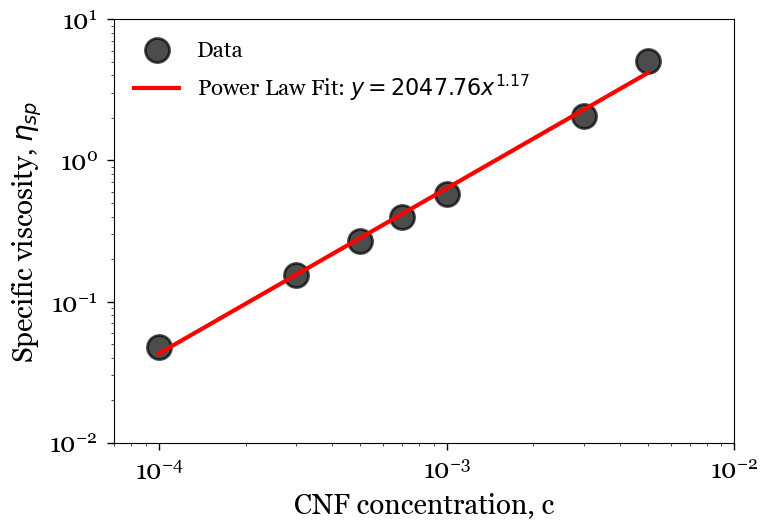

In [18]:
def power_law_func(x, a, b):
    return a * x**b

def objective(params, x, y):
    a, b = params
    y_pred_log = np.log(power_law_func(x, a, b))
    y_log = np.log(y)
    return np.sum((y_log - y_pred_log)**2)

initial_params = [1.0, -1.0]

result = minimize(objective, initial_params, args=(ubvis_cnfconc_frac, ubvis_spvis), method='L-BFGS-B')

a_power_law_opt, b_power_law_opt = result.x

plt.scatter(ubvis_cnfconc_frac, ubvis_spvis, s=300, alpha=0.7, marker='o', facecolors='k', edgecolors='k', linewidths=2, label='Data')

x_fit_power_law_opt = np.logspace(np.log10(min(ubvis_cnfconc_frac)), np.log10(max(ubvis_cnfconc_frac)), 100)
y_fit_power_law_opt = power_law_func(x_fit_power_law_opt, a_power_law_opt, b_power_law_opt)
plt.plot(x_fit_power_law_opt, y_fit_power_law_opt, '-', c='red', linewidth=3, label=f'Power Law Fit: $y = {a_power_law_opt:.2f}x^{{{b_power_law_opt:.2f}}}$')

plt.xscale('log')
plt.yscale('log')
plt.style.use('seaborn-notebook')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('CNF concentration, c', fontsize=20)
plt.ylabel("Specific viscosity, $\eta_{sp}$", fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.00007, 0.01)
plt.ylim(0.01, 10)
plt.legend(fontsize=16, frameon=False)
#plt.savefig("Specific Viscosity of Neat CNF loglog Opt.png", dpi=1500, bbox_inches='tight')
plt.show()